In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report , accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
data=pd.read_csv('forestfires.csv')

In [4]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
data1 = data.drop(columns=['month','day'])

In [6]:
le = LabelEncoder()
data1['size_category'] = le.fit_transform(data1['size_category'])

In [7]:
data1.tail()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
516,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,1


<Axes: xlabel='size_category', ylabel='count'>

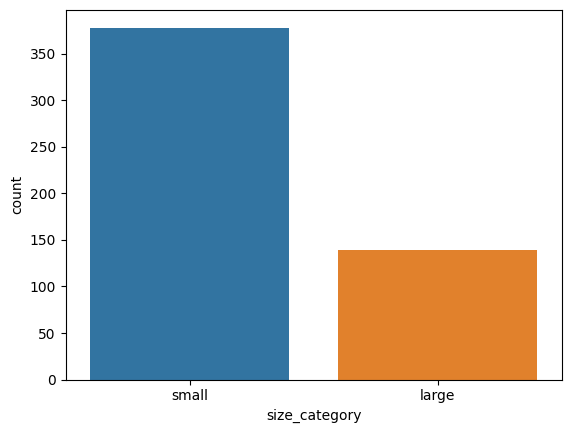

In [8]:
sns.countplot(x=data['size_category'])

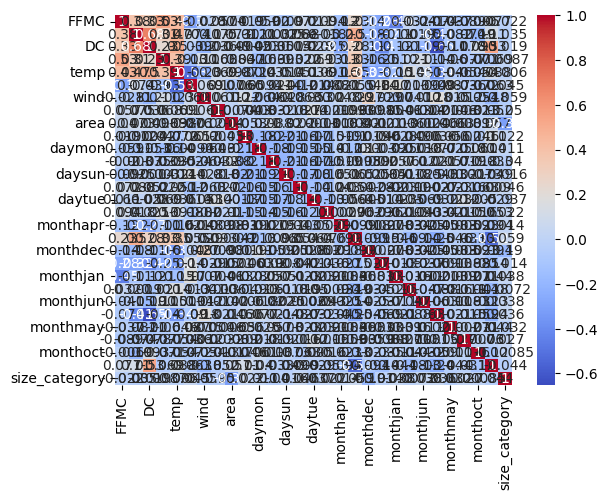

In [9]:
corr_matrix = data1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

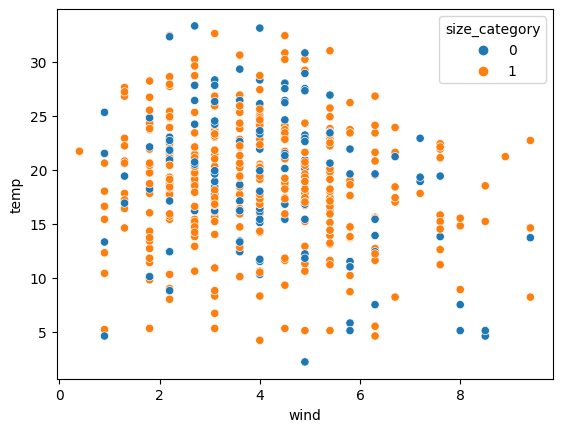

In [10]:
sns.scatterplot(x='wind', y='temp', hue='size_category', data=data1)
plt.show()

In [11]:
x_train = data1.iloc[:,0:28]
y_train = data1.iloc[:,28]

In [12]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
fires = norm_func(x_train)

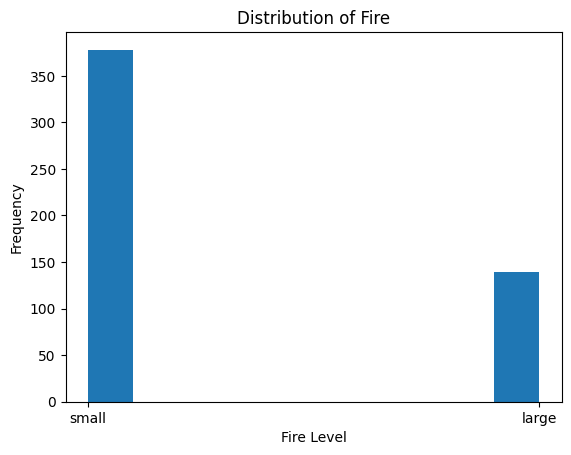

In [14]:
plt.hist(data['size_category'])
plt.xlabel('Fire Level')
plt.ylabel('Frequency')
plt.title('Distribution of Fire')
plt.show()

In [15]:
x_train,x_test,y_train,y_test = train_test_split(fires,y_train,test_size = 0.23,random_state=45)

In [16]:
model = SVC(kernel = "rbf")
model.fit(x_train,y_train)

SVC()

In [17]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred) *100
print("Accuracy score:",acc)

Accuracy score: 71.42857142857143


In [18]:
report = classification_report(y_test,y_pred)
print("Classification report:\n",report)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.03      0.06        35
           1       0.71      1.00      0.83        84

    accuracy                           0.71       119
   macro avg       0.86      0.51      0.44       119
weighted avg       0.80      0.71      0.60       119

